<a href="https://colab.research.google.com/github/WaleedAhmed565/Ai-lab1/blob/main/car_price_xg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from google.colab import files
uploaded = files.upload()


Saving pakwheels_pakistan_automobile_dataset.csv to pakwheels_pakistan_automobile_dataset (2).csv


loading csv with panda

In [36]:
import pandas as pd

# Load the uploaded file
df = pd.read_csv('pakwheels_pakistan_automobile_dataset.csv')

# Show the first few rows
df.head()


,manufacturer,price,city,model,mileage,fuel_type,transmission,registered,color,assembly,engine_capacity,post_date,price_category,price_category.1,price_category.2,price_category.3
0,Honda N One Premium 2014,2650000,Lahore,2014,82000,Petrol,Automatic,Lahore,Blue,Imported,660,5/4/2024,Medium,Medium,Saturday,10
1,Nissan Note 2020,5400000,Lahore,2020,59000,Hybrid,Automatic,Un-Registered,Silver,Imported,1200,5/4/2024,High,Medium,Saturday,4
2,Suzuki Vitara GLX 1.6 2017,0,Karachi,2017,67000,Petrol,Automatic,Karachi,Grey,Imported,1600,5/4/2024,Low,Medium,Saturday,7
3,Toyota Yaris Cross 2021,7850000,Lahore,2021,41000,Hybrid,Automatic,Un-Registered,Beige,Imported,1500,5/4/2024,High,Low,Saturday,3
4,BMW X1 sDrive18i 2017,10700000,Islamabad,2017,37000,Petrol,Automatic,Islamabad,White,Imported,1500,5/4/2024,High,Low,Saturday,7


installing xg

In [37]:
!pip install xgboost


importing libraries

In [38]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder


selecting features

In [39]:
# Select relevant columns
features = ['manufacturer', 'model', 'mileage', 'fuel_type', 'transmission', 'registered', 'color']
target = 'price'

# Keep only the required columns and drop rows with missing values
df = df[features + [target]].dropna()


In [ ]:
categorial columns

In [40]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


spliting tresting and traning data

In [41]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [43]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 12955808694272.0
Mean Absolute Error: 933394.9375


In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test data
y_pred = model.predict(X_test)

# Calculate Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print Results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score (R²):", r2)


Mean Absolute Error (MAE): 933394.9375
Mean Squared Error (MSE): 12955808694272.0
Root Mean Squared Error (RMSE): 3599417.827131493
R-squared Score (R²): 0.6831821203231812


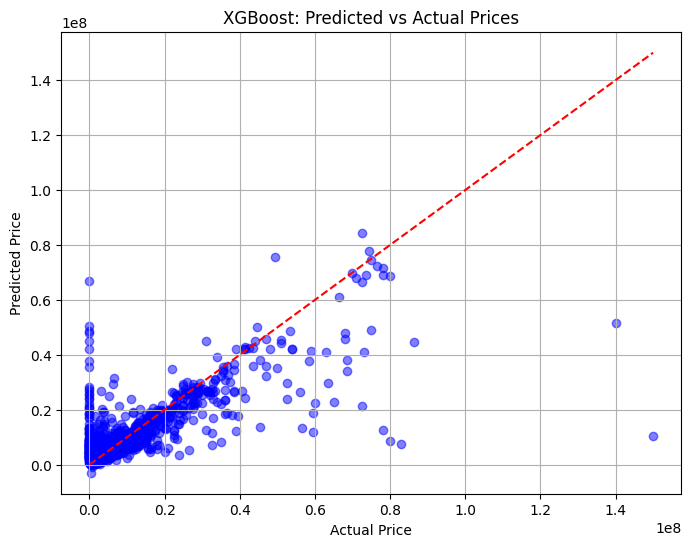

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test_actual, y_pred, alpha=0.5, color='blue')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('XGBoost: Predicted vs Actual Prices')
plt.grid(True)
plt.show()


In [46]:
import joblib

# Save model
joblib.dump(model, 'xgboost_car_price_model.pkl')


['xgboost_car_price_model.pkl']